## Nitesh Kumar
### Batch-4

In [1]:
import pandas as pd

In [2]:
# Read file and store in dataframe
df=pd.read_csv("insurance.csv")

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
# check any null value
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
# Check any duplicate value
df.duplicated().sum()

1

In [6]:
# we got 1 duplicate value so we remove it
df.drop_duplicates(inplace=True)

In [7]:
# check data type of all column data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [8]:
# check how many columns present in data
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

## Visualization

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
df["sex"].value_counts()

male      675
female    662
Name: sex, dtype: int64

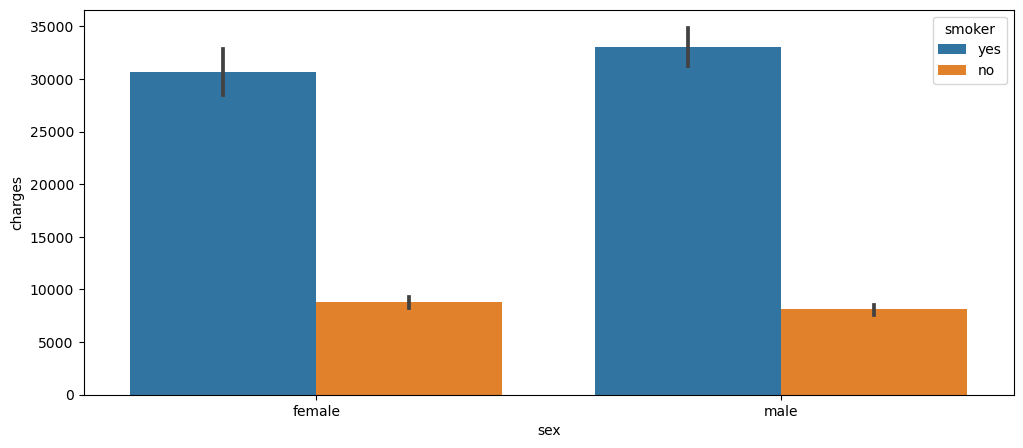

In [11]:
plt.figure(figsize=(12,5))
sns.barplot(data=df,x="sex",y="charges",hue="smoker")
plt.show()

## Insights

it seems that the male or a female, if they are smoker then insurance cost so high.

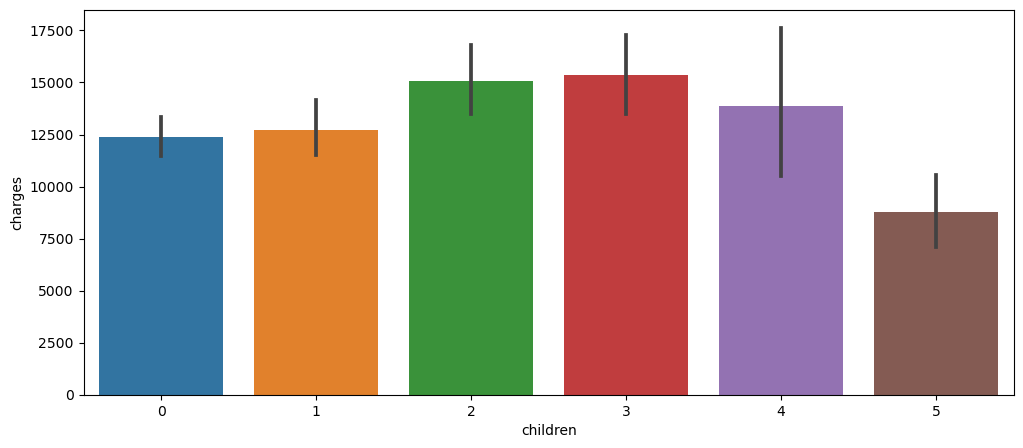

In [40]:
plt.figure(figsize=(12,5))
sns.barplot(data=df,x="children",y="charges")
plt.show()

## Insights
The person who have 2 or 3 children have insurance cost high

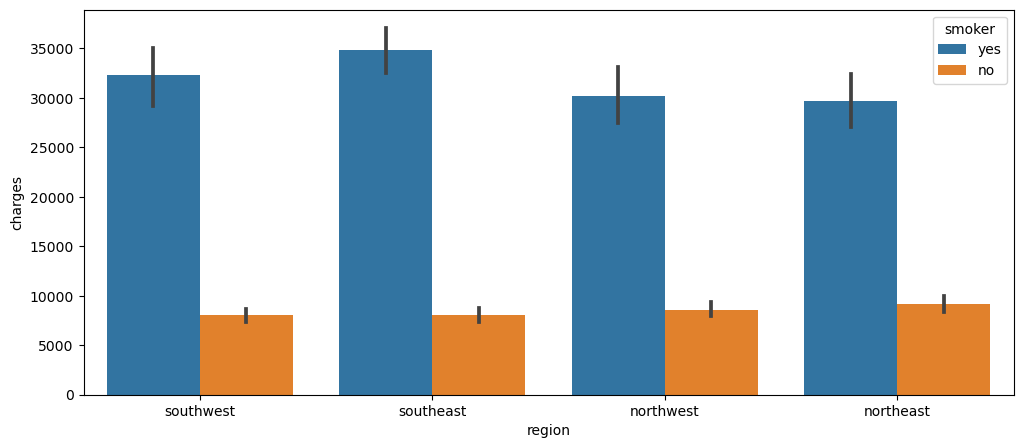

In [44]:
plt.figure(figsize=(12,5))
sns.barplot(data=df,x="region",y="charges",hue="smoker")
plt.show()

## Insights
The smoker have high insurance cost of all region. In all of this southeast have high insurance cost.

## Model Building

In [4]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


##### we have 3 column wherein categorical data present. So for building the model we have to convert the categorical value into the numerical value

### sex

In [5]:
df[["sex"]]=pd.get_dummies(df[["sex"]],drop_first=True)

#drop_first=True, it will drop one of the one-hot encoded columns to avoid multicollinearity.

#For example, if the "sex" column had values "male" and "female," it would create a new column 
# for "male" and "female," but "female" would be dropped (i.e., if "male" is 0, it implies "female" is 1,
#and vice versa).

In [6]:
df["sex"].value_counts() # male-1 and female- 0

1    676
0    662
Name: sex, dtype: int64

### smoker

In [7]:
df["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [8]:
df[["smoker"]]=pd.get_dummies(df[["smoker"]],drop_first=True)

In [9]:
df["smoker"].value_counts() # no- 0 and yes- 1

0    1064
1     274
Name: smoker, dtype: int64

### region

In [10]:
df["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [11]:
df["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
lbl_encoder=LabelEncoder()

In [14]:
df["region"]=lbl_encoder.fit_transform(df["region"])

In [15]:
df["region"].value_counts()

# northeast- 0
# northwest-1
# southwest- 3
# southeast- 4

2    364
3    325
1    325
0    324
Name: region, dtype: int64

In [16]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   uint8  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   uint8  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(3), uint8(2)
memory usage: 55.0 KB


In [18]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


In [19]:
import seaborn as sns

<AxesSubplot: >

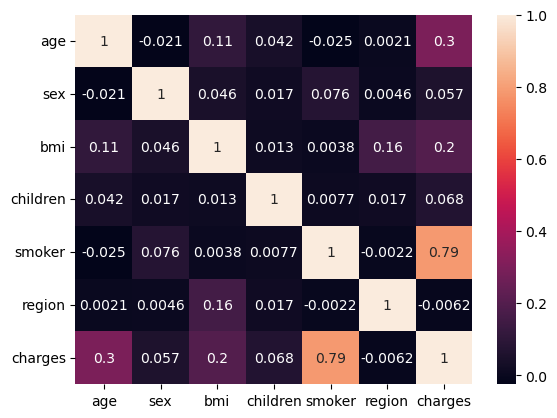

In [20]:
sns.heatmap(df.corr(),annot=True)

In [21]:
df.to_csv("insurance_cleandata.csv")

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

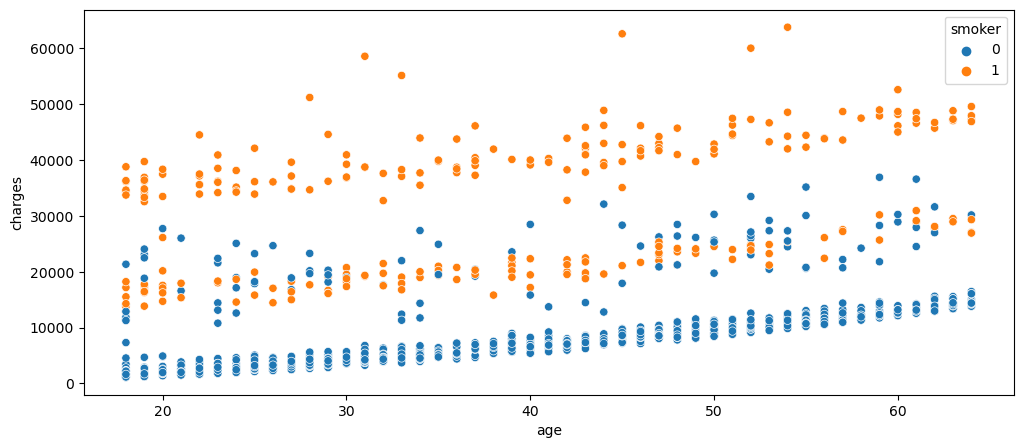

In [25]:
plt.figure(figsize=(12,5))
sns.scatterplot(data=df,x="age",y="charges",hue="smoker")
plt.show()

### Insights
The smoker who have age between 30 to 55 have high insurance cost

In [26]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
# define Independent and dependent feature

In [28]:
X=df[["age","sex","bmi","children","smoker","region"]]

In [29]:
y=df[["charges"]]

In [30]:
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [31]:
y

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [ ]:
# split train test data

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [34]:
X.shape,X_train.shape

((1338, 6), (1070, 6))

In [35]:
y.shape,y_train.shape

((1338, 1), (1070, 1))

In [ ]:
## training the model by train data

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
regressor=LinearRegression()

In [38]:
regressor.fit(X_train,y_train)

LinearRegression()

In [39]:
regressor.coef_

array([[ 2.57056264e+02, -1.87914567e+01,  3.35781491e+02,
         4.25091456e+02,  2.36478181e+04, -2.71284266e+02]])

In [40]:
regressor.intercept_

array([-11946.60656726])

In [ ]:
# predict the data by using test data

In [41]:
y_test_pred=regressor.predict(X_test)

# performance matrix

In [42]:

from sklearn.metrics import mean_squared_error,mean_absolute_error

In [43]:
mse=mean_squared_error(y_test,y_test_pred)
mae=mean_absolute_error(y_test,y_test_pred)
import numpy as np
rmse=np.sqrt(mse)
print("mse value is :",mse)
print("mae value is :",mae)
print("rmse value is :", rmse)

mse value is : 33635210.431178406
mae value is : 4186.508898366434
rmse value is : 5799.587091438356


# R squre

In [44]:

from sklearn.metrics import r2_score

In [45]:
score=r2_score(y_test,y_test_pred)

In [46]:
score

0.7833463107364539

# adjusted R square

In [47]:

Adj_R_score=1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

In [48]:
Adj_R_score

0.7783657661556826

In [49]:
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [50]:
X.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype='object')

In [ ]:
## Tesing the build model for applying new applicant data

In [64]:
new_applicant={"age":18,"sex":1,"bmi":33.77,"children":1,"smoker":0,"region":2}


In [65]:
Applicant_df=pd.DataFrame(new_applicant,index=[0])

In [66]:
Applicant_df

,age,sex,bmi,children,smoker,region
0,18,1,33.77,1,0,2


In [67]:
cost_pred=regressor.predict(Applicant_df)

In [68]:
cost_pred

array([[3883.47859645]])

# Asumption

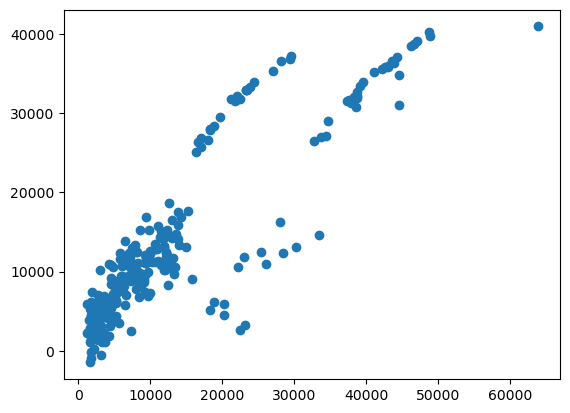

In [69]:
plt.scatter(y_test,y_test_pred)
plt.show()

In [70]:
Residuals=y_test-y_test_pred

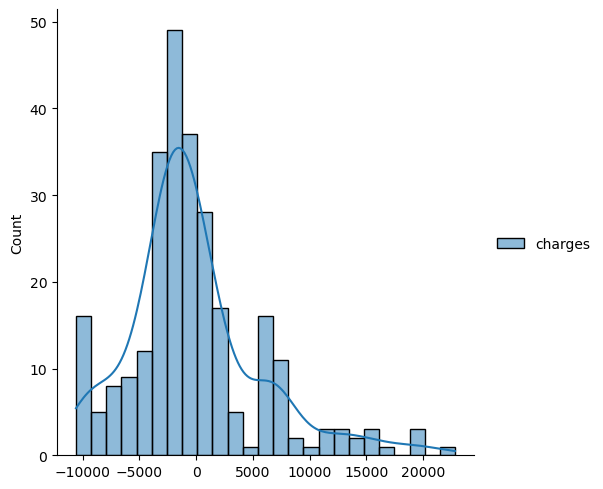

In [71]:
sns.displot(Residuals,kde=True)
plt.show()

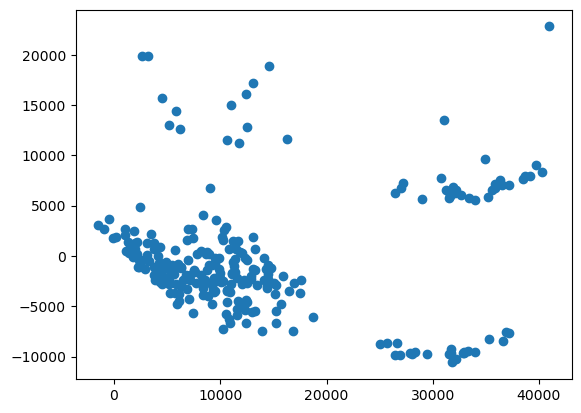

In [72]:
# for uniform distribution
plt.scatter(y_test_pred,Residuals)
plt.show()